<h3>Loading Libraries:</h3>

In [64]:
import pickle
import numpy as np
import pandas as pd

In [65]:
#Loading dataset:
df = pd.read_csv('ipl.csv')

In [66]:
print(df.shape)
df.head()

(76014, 15)


,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [67]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [68]:
#Cleaning:
#Columns to drop:
#mid,batsman,bowler,striker,non-striker
col_rem = ['mid','batsman','bowler','striker','non-striker']
df = df.drop(labels = col_rem,axis = 1)

In [69]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [70]:
a = df['bat_team'].unique()
b = df['bowl_team'].unique()
#To see if all teams are covered, we will see difference:
set(a)-set(b)
#If it returns an empty set, we can choose either of a or b as reference of all teams.

set()

In [71]:
print(a)

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Deccan Chargers' 'Kings XI Punjab'
 'Royal Challengers Bangalore' 'Delhi Daredevils' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Rising Pune Supergiants'
 'Gujarat Lions' 'Rising Pune Supergiant']


In [72]:
required_teams = ['Kolkata Knight Riders','Chennai Super Kings','Rajasthan Royals','Mumbai Indians','Kings XI Punjab','Royal Challengers Bangalore','Delhi Daredevils','Sunrisers Hyderabad']
#Selecting data from current playing teams:
df = df[ ( df['bat_team'].isin(required_teams) ) &  ( df['bowl_team'].isin(required_teams) ) ]
print(df.shape)
df.head()

(53811, 10)


,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [73]:
a = df['bat_team'].unique()
b = df['bowl_team'].unique()
a.sort()
b.sort()
print(a)
print(b)

['Chennai Super Kings' 'Delhi Daredevils' 'Kings XI Punjab'
 'Kolkata Knight Riders' 'Mumbai Indians' 'Rajasthan Royals'
 'Royal Challengers Bangalore' 'Sunrisers Hyderabad']
['Chennai Super Kings' 'Delhi Daredevils' 'Kings XI Punjab'
 'Kolkata Knight Riders' 'Mumbai Indians' 'Rajasthan Royals'
 'Royal Challengers Bangalore' 'Sunrisers Hyderabad']


In [74]:
#Considering all overs except first 6 overs (powerplay)
df = df[df['overs']>= 6.0]

In [75]:
print(df.shape)
df.head()

(37389, 10)


,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
38,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,62,1,6.1,55,1,222
39,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,63,1,6.2,52,1,222
40,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,64,1,6.3,47,1,222
41,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,66,1,6.4,45,1,222
42,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,67,1,6.5,46,1,222


In [76]:
#For venue:
df['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Sawai Mansingh Stadium',
       'MA Chidambaram Stadium, Chepauk', 'Eden Gardens',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera',
       'Himachal Pradesh Cricket Association Stadium',
       'Subrata Roy Sahara Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
       'Barabati Stadium', 'Maharashtra Cricket Association Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Punjab Cricket Association IS Bi

In [77]:
#"Punjab Cricket Association Stadium, Mohali" is same as "Punjab Cricket Association IS Bindra Stadium, Mohali" hence replace.
df.replace(to_replace ="Punjab Cricket Association Stadium, Mohali", 
                 value ="Punjab Cricket Association IS Bindra Stadium, Mohali")
df['venue'].unique()
df.shape

(37389, 10)

In [78]:
#considering indian venues(omiting South African and UAE venues):
# Note: this is assuming IPL score is conducted in Indian venue for prediction. 
required_venue = ['M Chinnaswamy Stadium',
                  'Feroz Shah Kotla',
       'Wankhede Stadium', 'Sawai Mansingh Stadium',
       'MA Chidambaram Stadium, Chepauk', 'Eden Gardens',
       'Dr DY Patil Sports Academy',
       'Brabourne Stadium',
       'Sardar Patel Stadium, Motera',
       'Himachal Pradesh Cricket Association Stadium',
       'Subrata Roy Sahara Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 
       'Barabati Stadium', 'Maharashtra Cricket Association Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Holkar Cricket Stadium']
df = df[ df['venue'].isin(required_venue) ]
print(df.shape)

(29889, 10)


In [79]:
df.dtypes

date               object
venue              object
bat_team           object
bowl_team          object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
total               int64
dtype: object

In [80]:
#Date column is in object/string format, hence we convert it into Date format.
df['date'] =  pd.to_datetime(df['date'], format='%Y/%m/%d')
df.dtypes

date              datetime64[ns]
venue                     object
bat_team                  object
bowl_team                 object
runs                       int64
wickets                    int64
overs                    float64
runs_last_5                int64
wickets_last_5             int64
total                      int64
dtype: object

In [81]:
#OneHotEncoding for Categorical Features like team and venue.
new_df = pd.get_dummies(data = df, columns = ['venue','bat_team','bowl_team'])
new_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,venue_Barabati Stadium,venue_Brabourne Stadium,venue_Dr DY Patil Sports Academy,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
38,2008-04-18,62,1,6.1,55,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
39,2008-04-18,63,1,6.2,52,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
40,2008-04-18,64,1,6.3,47,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
41,2008-04-18,66,1,6.4,45,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
42,2008-04-18,67,1,6.5,46,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [82]:
#Train/Test data split. 
# We can treat this the total/target as time dependent, hence we can take intial portion of data as train dataset and
# ending portion as test dataset.

train_df = new_df[new_df['date'].dt.year <= 2016]
train_df = train_df.drop(labels ='total',axis = True)
# or
#train_df = new_df.drop(labels = 'total',axis = True)[new_df['date'].dt.year <= 2016]

#Similarily for test_df:
test_df = new_df.drop(labels = 'total',axis = True)[new_df['date'].dt.year >= 2017]

# The 'date' feature can be dropped since it was usefull only for the splitting of the dataset:
train_df = train_df.drop(labels = 'date',axis = True)
test_df = test_df.drop(labels = 'date',axis = True)

In [83]:
train_df.head()

,runs,wickets,overs,runs_last_5,wickets_last_5,venue_Barabati Stadium,venue_Brabourne Stadium,venue_Dr DY Patil Sports Academy,venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,venue_Eden Gardens,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
38,62,1,6.1,55,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
39,63,1,6.2,52,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
40,64,1,6.3,47,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
41,66,1,6.4,45,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
42,67,1,6.5,46,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [84]:
test_df.head()

,runs,wickets,overs,runs_last_5,wickets_last_5,venue_Barabati Stadium,venue_Brabourne Stadium,venue_Dr DY Patil Sports Academy,venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,venue_Eden Gardens,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
68900,60,1,6.1,48,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
68901,60,1,6.2,47,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
68902,61,1,6.3,42,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
68903,62,1,6.4,43,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
68904,63,1,6.5,44,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [85]:
#For target feature: 
train_target = new_df[new_df['date'].dt.year <= 2016]['total'].values #Self Note: adding .values makes the dataframe into an array
test_target = new_df[new_df['date'].dt.year >= 2017]['total'].values
train_target.size + test_target.size #returns 29889, so no loss in data.

29889

<h3>Model Fitting:</h3>

In [86]:
#Lin Reg Model:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(train_df,train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
#Parameters:
print('The coefficients for each feature are:\n',regressor.coef_,'\n')
print('The intercept for the linear regression is:',regressor.intercept_)

The coefficients for each feature are:
 [ 9.70708863e-01 -4.57407016e+00 -6.73523317e+00 -4.31548430e-02
 -1.01887630e+00  7.21362451e+00  4.44332401e+00 -3.66523359e+00
 -3.53163715e+00 -1.90355083e+00  1.09704184e+00  5.37707392e+00
 -1.06581410e-14 -1.35966733e+01  1.96978669e+00 -4.22623795e+00
  5.25991659e+00  1.86823951e+00 -8.00344147e+00  1.74372704e+00
 -1.11740622e-01 -2.98416106e+00  7.21435065e+00  1.83559120e+00
  3.02151130e+00 -3.90685347e+00 -6.73438793e-01 -3.89845139e+00
  2.18355110e+00 -4.97354782e+00  4.80892095e+00  3.43830813e+00
  1.35563122e+00 -5.70699296e-01  2.85057495e-01 -3.42042592e+00
 -1.08749824e+00  3.23892112e-01  7.95461344e-01  2.31858128e+00] 

The intercept for the linear regression is: 171.34468805149663


In [89]:
prediction = regressor.predict(test_df)

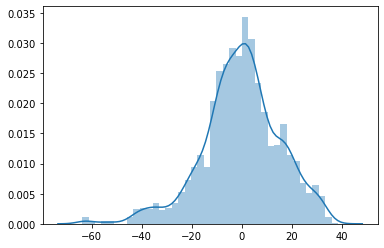

In [90]:
import seaborn as sns
sns.distplot(test_target-prediction)

In [91]:
from sklearn import metrics
print('Mean Abs Error:',metrics.mean_absolute_error(test_target,prediction))
print('Mean Squared Error:',metrics.mean_squared_error(test_target,prediction))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(test_target,prediction)))

Mean Abs Error: 11.858030735178037
Mean Squared Error: 244.37633251128904
Root Mean Squared Error: 15.632540820713984


### Ridge Regression

In [92]:
## Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [102]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,50,60,70,80,100,120,150,200,1000,1e4,1e5,1e6,1e7,1e8]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=10)
ridge_regressor.fit(train_df,train_target)

C:\Users\Aditya\MiniConda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.95368e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Aditya\MiniConda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.89515e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Aditya\MiniConda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.92589e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Aditya\MiniConda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.86403e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Aditya\MiniConda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.89445e-18): result may not be ac

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 50, 60, 70, 80, 100, 120,
                                   150, 200, 1000, 10000.0, 100000.0, 1000000.0,
                                   10000000.0, 100000000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [104]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 10000.0}
-299.9162645980713


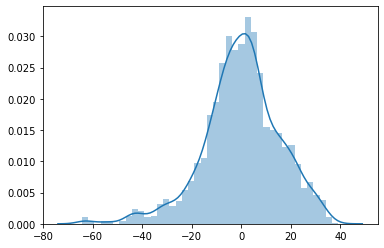

In [105]:
rid_prediction = ridge_regressor.predict(test_df)
sns.distplot(test_target-rid_prediction)

In [108]:
from sklearn import metrics
print('Mean Abs Error:',metrics.mean_absolute_error(test_target,rid_prediction))
print('Mean Squared Error:',metrics.mean_squared_error(test_target,rid_prediction))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(test_target,rid_prediction)))

Mean Abs Error: 11.70578233508202
Mean Squared Error: 240.87154599231297
Root Mean Squared Error: 15.520036919811531


### Lasso Regression

In [118]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

In [136]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,50,60,70,80,100,120,150,200,1000,1e4,1e5,1e6,1e7,1e8]}
lasso_regressor=RandomizedSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=50)
lasso_regressor.fit(train_df,train_target)

C:\Users\Aditya\MiniConda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3567654.3026672667, tolerance: 2369.9526034166956
  positive)
C:\Users\Aditya\MiniConda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3598384.6392624686, tolerance: 2409.038745878659
  positive)
C:\Users\Aditya\MiniConda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3465788.0813997174, tolerance: 2347.706608395949
  positive)
C:\Users\Aditya\MiniConda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did 

C:\Users\Aditya\MiniConda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3556716.330356369, tolerance: 2357.2126508541733
  positive)
C:\Users\Aditya\MiniConda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3418560.90195939, tolerance: 2401.643104728795
  positive)
C:\Users\Aditya\MiniConda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3517864.546280465, tolerance: 2423.465928630705
  positive)
C:\Users\Aditya\MiniConda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not 

C:\Users\Aditya\MiniConda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 871216.7154619414, tolerance: 2359.5637143060076
  positive)
C:\Users\Aditya\MiniConda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 876603.1384189669, tolerance: 2401.035255781093
  positive)
C:\Users\Aditya\MiniConda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 416282.225345362, tolerance: 2383.151135882771
  positive)
C:\Users\Aditya\MiniConda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not 

C:\Users\Aditya\MiniConda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 865246.7985360441, tolerance: 2404.0168256214724
  positive)
C:\Users\Aditya\MiniConda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1291629.668106658, tolerance: 2420.9617443833877
  positive)
C:\Users\Aditya\MiniConda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 910361.7988757859, tolerance: 2407.24324634593
  positive)
C:\Users\Aditya\MiniConda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not

RandomizedSearchCV(cv=50, error_score=nan,
                   estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=1000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=None, selection='cyclic',
                                   tol=0.0001, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'alpha': [1e-15, 1e-10, 1e-08, 0.001,
                                                  0.01, 1, 5, 10, 20, 30, 35,
                                                  40, 50, 60, 70, 80, 100, 120,
                                                  150, 200, 1000, 10000.0,
                                                  100000.0, 1000000.0,
                                                  10000000.0, 100000000.0]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
       

In [137]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.01}
-314.0817987120332


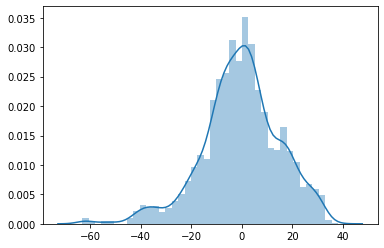

In [138]:
lass_prediction = lasso_regressor.predict(test_df)
sns.distplot(test_target-lass_prediction)

In [139]:
from sklearn import metrics
print('Mean Abs Error:',metrics.mean_absolute_error(test_target,lass_prediction))
print('Mean Squared Error:',metrics.mean_squared_error(test_target,lass_prediction))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(test_target,lass_prediction)))

Mean Abs Error: 11.742549136036864
Mean Squared Error: 239.2341543295399
Root Mean Squared Error: 15.467196071995076


In [140]:
# Creating a pickle file for the regression model:
filename = 'ipl_score_lasso_reg.pkl'
pickle.dump(lasso_regressor, open(filename, 'wb'))